# The "Perfect" Release Point: Step 2 Analysis
### By: Hadriana Lowenkron

## Create a notebook that focuses on analyzing your data

* Create a notebooks in the `data_analysis` folder of your group's project folder to carry out some analysis of your data to answer some questions related to your group's overall research question.


* The notebook(s) should be organized into a series of blocks that follow the:
    * _question_
    * _steps_
    * _code_
    * _answer_
    * _interpretation/observation_ 
    
  sequence we have talked about.


* These steps are:
    1. **QUESTION**: What is the question you are going to answer in this block, e.g.
        * _How many crashes in Philadelphia in 2013 involved SUVs or large trucks?_
        * _Which zipcodes reported the highest proportion of children with high lead blood levels?_
        * _Is the proportion of the population living in urban areas increasing in counties in the African continent?_
       
       _(The typology of kinds of data story components can be helpful. Try to use a number of the different kinds)_ <br/><br/>
       
    2. **STEPS**: Lay out the conceptual analysis steps to go from your data to the answer. Do this in bullet points in Markdown, e.g. for the first question above, these would be:
       1. _Create filters for rows where `year` is 2013 and `SUV_count` or `large_truck_count` greater than 0_
       2. _Subset the complete crash data frame_
       3. _Count the number of rows_ <br/><br/>
    3. **CODE**: Implement these steps in one or more code cell(s). Remember to include comments, e.g.:
       ```
       # Create filters for rows where 'year' is 2013 and 'SUV_count' or 'large_truck_count' greater than 0
       y2013_filter = crash_df['year']==2013
       suv_filter = crash_df['SUV_count']>0
       large_truck_filter = crash_df['large_truck_count']>0
       
       # Subset the complete crash data frame
       suv_truck_2013_df = crash_df[(y2013_filter) & (suv_filter | large_truck_filter)]
       
       # Count the number of rows
       crash_num = suv_truck_2013_df.shape[0]
       ``` 
       <br/><br/>
    4. **ANSWER**: State the answer in narrative form (in a Markdown cell). <br/><br/>
    5. **INTERPRETATION/OBSERVATION**: Add some observations and interpretations of what you have found. Also remember to note follow up questions that become relevant after answering the question.
    
    
    
#### NOTES

* Examples can be found in these notebooks:
    * `comm318_F21_Data_Stories_Part1_and_initial_data_exploration_10-11-21/use_of_data_in_stories_part1.ipynb`
    * `comm318_F21_Data_Stories_Part2_10-18-21/use_of_data_in_stories_part2.ipynb`


* The type of questions you ask and apply these steps to will vary depending on your specific project.


* Try to include at least 5 blocks following steps 1-5 for each. You can include more than this of course!

## Step 1. Setup and importing the data and codebooks

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import HTML, Markdown, display
import seaborn as sns
import numpy as np
import shapely
import json
import plotly

In [13]:
pd.set_option('display.max_columns', None)
cleanRP_df = pd.read_csv('../data/Clean_Data_Files/RP_df.csv')
cleanRP_df

,Unnamed: 0,pitches,player_id,player_name,total_pitches,pitch_percent,xwoba,xba,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,horizontal_release_point_ft,absolute_value_horizontal_release_point
0,0,140,518617,"Diekman, Jake",1118,12.5,0.137,0.111,140,88.8,16.9,2380,91.6,88.25,55,126,14,-3.4,6.36,3.28,3.28
1,1,160,608718,"Suter, Brent",1221,13.1,0.127,0.122,159,80.5,5.6,2151,86.6,87.23,37,150,10,0.6,7.18,2.80,2.80
2,2,113,621368,"Hearn, Taylor",1726,6.5,0.149,0.141,113,85.3,17.6,2173,92.2,87.84,29,103,10,-4.4,6.19,2.65,2.65
3,3,100,592662,"Ray, Robbie",3141,3.2,0.105,0.098,99,85.7,19.9,2222,91.7,91.90,37,87,13,0.2,6.43,2.52,2.52
4,4,128,656945,"Scott, Tanner",1032,12.4,0.142,0.131,125,89.1,5.2,2649,91.4,91.45,41,112,16,0.0,6.22,2.49,2.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,103,571670,"Floro, Dylan",1076,9.6,0.157,0.139,103,83.4,18.9,2091,90.7,90.46,19,92,11,-0.2,6.30,-3.37,3.37
71,71,148,518553,"Cishek, Steve",1255,11.8,0.144,0.125,144,83.6,11.1,2355,86.5,88.29,31,132,16,1.8,7.55,-3.37,3.37
72,72,134,643256,"Cimber, Adam",1022,13.1,0.155,0.143,133,84.6,6.9,2259,84.6,82.32,28,130,4,-2.3,6.34,-3.67,3.67
73,73,127,623149,"Sewald, Paul",1104,11.5,0.090,0.076,127,83.4,24.5,2370,88.6,88.16,54,109,18,-0.4,6.46,-3.85,3.85


## Table of Contents:

**Block 1** - Which relief pitchers throw the fastest on average?

**Block 2** - How many relief pitchers threw below 80 mph on average? How many relief pitchers threw above 95 mph on average?

**Block 3** - What percentage of relief pitchers threw 50 or more whiffs?

**Block 4** - Are there more lefty sidearmers or righty sidearmers? (Sidearmers have a horizontal release point of above 2.65 ft or below -2.65 ft).

**Block 5** - What is the average launch speed (exit velocity for ball) for each horizontal release point?

**Block 6** - What is the relationship between effective speed and launch speed?

# Block 1

### Question: Which relief pitchers throw the fastest on average?

### Steps:

* Order player names by their pitch velocity 
* Label the fastest pitchers as the top 5 pitchers of the list
* Run that list

In [41]:
# Order dataframe by player name and velocity and sort it from fastest to slowest
pitchspeedorder = cleanRP_df.groupby('player_name')['velocity'].mean().sort_values(ascending=False)

# Run the top 5 of the list, which will return the 5 fastes pitchers
fastestpitchers = pitchspeedorder.head()
fastestpitchers

player_name
Alvarado, José        97.9
Familia, Jeurys       95.4
Alcantara, Sandy      94.4
Cisnero, José         94.2
Loáisiga, Jonathan    93.9
Name: velocity, dtype: float64

### ANSWER: 

The 5 relief pitchers that throw the fastest on average in order from fastest to slowest are José Alvarado, Jeurys Familia, Sandy Alcantara, José Cisnero, and Jonathan Loáisiga, with pitches at 97.9, 95.4, 94.4, 94.2, and 93.9, respectively, miles per hour.

### INTERPRETATION/OBSERVATION:

Now that I know the 5 fastest, I can look more closely into their other statistics (i.e. effective speed, horizontal release point, etc.) to ascertain what specifically makes them pitch that fast, which will help in later parts of the project analyze the different factors that make the best pitchers.

# Block 2

### Question: How many relief pitchers threw below 80 mph on average? How many relief pitchers threw above 95 mph on average?

### Steps:

* Create filters where the velocity is under 80mph and over 95mph
* Subset the data to run the players within that filter and sort that list by velocity

In [42]:
# Create filter where the velocity is under 80mph
under80mph_filter = cleanRP_df['velocity'] < 80

# Subset the data to run the players within that filter and sort that list by velocity
pitchunder80 = cleanRP_df[under80mph_filter].groupby('player_name')['velocity'].mean().sort_values()

# Print list
title1='Pitchers who threw pitches under 80mph'
print(title1)
print('-'*len(title1))
print(pitchunder80)
print()

Pitchers who threw pitches under 80mph
--------------------------------------
player_name
Rogers, Tyler    77.1
Romo, Sergio     79.3
Name: velocity, dtype: float64



In [43]:
# Create filter where the velocity is over 95mph
over95mph_filter = cleanRP_df['velocity'] > 95

# Subset the data to run the players within that filter and sort that list by velocity
pitchover95 = cleanRP_df[over95mph_filter].groupby('player_name')['velocity'].mean().sort_values()

# Print list
title1='Pitchers who threw pitches over 95mph'
print(title1)
print('-'*len(title1))
print(pitchover95)
print()

Pitchers who threw pitches over 95mph
-------------------------------------
player_name
Familia, Jeurys    95.4
Alvarado, José     97.9
Name: velocity, dtype: float64



### ANSWER: 

The pitchers who threw pitches under 80mph are Tyler Rogers and Sergio Romo, with pitches at 77.1 and 79.3, respectively, miles per hour. The pitchers who threw pitches over 95mph are Jeurys Familia and José Alvarado, with pitches at 95.4 and 97.9, respectively, miles per hour.

### INTERPRETATION/OBSERVATION:


Now that I know these extreme outliers on both ends (fastest and slowest), I can look more closely into their other statistics (i.e. effective speed, horizontal release point, etc.) to ascertain what specifically makes them pitch that fast or slow, which will help in later parts of the project analyze the different factors that make the best pitchers.

# Block 3

### Question: What percentage of relief pitchers threw 50 or more whiffs?

### Steps:

* Create filter where the number of whiffs is at or larger than 50
* Subset the data to run the players within that filter and sort that list by number of whiffs
* Calculate percent of that number of players out of the total number of players

In [21]:
# Create filter where the number of whiffs is at or larger than 50
over49_filter = cleanRP_df['whiffs'] >= 50

# Subset the data to run the players within that filter and sort that list by number of whiffs
over49whiffs = cleanRP_df[over49_filter].groupby('player_name')['whiffs'].mean().sort_values()
over49whiffs

player_name
Wheeler, Zack         52.0
Boxberger, Brad       53.0
Jackson, Luke         53.0
Kopech, Michael       54.0
Sewald, Paul          54.0
Diekman, Jake         55.0
Stanek, Ryne          56.0
Treinen, Blake        57.0
Gallegos, Giovanny    58.0
May, Trevor           59.0
Green, Chad           61.0
Mayers, Mike          65.0
Name: whiffs, dtype: float64

In [48]:
# Calculate percent of that number of players out of the total number of players in the dataframe
percentwhiffs = ((len(over49whiffs))/(len(cleanRP_df)))*100
percentwhiffs

16.0

### ANSWER: 

The percentage of players who hit 50 or more whiffs is 16%. 

### INTERPRETATION/OBSERVATION:

Since hitting whiffs is a sign of a pitcher's success, I can look at these players' other statistics  (i.e. effective speed, horizontal release point, etc.) to ascertain what specifically makes them pitch that many whiffs, which will help in later parts of the project analyze the different factors that make the best pitchers.

# Block 4

### Question: Are there more lefty sidearmers or righty sidearmers? (Sidearmers have a horizontal release point of above 2.65 ft or below -2.65 ft).

### Steps:

* Create filters where the horizontal release point is below -2.65 and above 2.65
* Subset the data to run the players within that filter and sort that list by horizontal release point

In [45]:
# Create filter where the horizontal release point is below -2.65
lefty_sidearmers_filter = cleanRP_df['horizontal_release_point_ft'] < -2.65

# Subset the data to run the players within that filter and sort that list by horizontal release point
lefties = cleanRP_df[lefty_sidearmers_filter].groupby('player_name')['horizontal_release_point_ft'].mean().sort_values()
lefties

player_name
Rogers, Tyler    -4.00
Sewald, Paul     -3.85
Cimber, Adam     -3.67
Cishek, Steve    -3.37
Floro, Dylan     -3.37
Berríos, José    -3.28
Scherzer, Max    -3.28
Shaw, Bryan      -3.20
Treinen, Blake   -3.07
Romo, Sergio     -2.94
Duffey, Tyler    -2.76
Castro, Miguel   -2.66
Name: horizontal_release_point_ft, dtype: float64

In [46]:
# Create filter where the horizontal release point is above 2.65
righty_sidearmers_filter = cleanRP_df['horizontal_release_point_ft'] > 2.65

# Subset the data to run the players within that filter and sort that list by horizontal release point
righties = cleanRP_df[righty_sidearmers_filter].groupby('player_name')['horizontal_release_point_ft'].mean().sort_values()
righties

player_name
Suter, Brent     2.80
Diekman, Jake    3.28
Name: horizontal_release_point_ft, dtype: float64

### ANSWER: 

There are 12 lefty sidearmers and 2 righty sidearmers, so there are 10 more lefty sidearmers than righty sidearmers. (The other players in the dataset throw too close to center to be labeled a sidearmer.)

### INTERPRETATION/OBSERVATION:

Now that I know the 12 pitchers with the most extreme horizontal release points on both ends, I can look more closely into their other statistics (i.e. velocity, effective speed, etc.) to ascertain whether their horizontal release point affects their speed, which will help in later parts of the project analyze the different factors that make the best pitchers.

# Block 5

### Question: What is the average launch speed (exit velocity for ball) for each horizontal release point?

### Steps:

* Create bins with each horizontal release point
* Group the dataframe by bins with respect to launch speed and take the average

In [50]:
# Create bins with each horizontal release point
bins = pd.cut(cleanRP_df['absolute_value_horizontal_release_point'], [
    0, 1, 2, 3, 4])

# Group the dataframe by bins with respect to launch speed and take the average
speedbyreleasepoint = cleanRP_df.groupby(bins)['launch_speed'].mean()
print('Launch speed in bins by horizontal release point')
speedbyreleasepoint

Launch speed in bins by horizontal release point


absolute_value_horizontal_release_point
(0, 1]    86.288889
(1, 2]    85.093939
(2, 3]    85.121739
(3, 4]    84.840000
Name: launch_speed, dtype: float64

### ANSWER: 

When the absolute value of the horizontal release point is between 0 and 1, the average launch speed is 86.29 mph. When the absolute value of the horizontal release point is between 1 and 2, the average launch speed is 85.09 mph. When the absolute value of the horizontal release point is between 2 and 3, the average launch speed is 85.12 mph. When the absolute value of the horizontal release point is between 3 and 4, the average launch speed is 84.84 mph.   

### INTERPRETATION/OBSERVATION:

This analysis indicates that there is a negative relationship between horizontal release point and effective speed: as horizontal release point increases, effective speed decreases. In regular terms, the farther out the pitch is released, the slower the ball will travel.

# Block 6

### Question: What is the relationship between effective speed and launch speed? (expect: more you hit it from side, worse the batter will hit it at)

### Steps:

* Plot effective speed on x axis and launch speed on y axis and plug in dataframe

[Text(0.5, 1.0, 'RP - Effective Speed vs Launch Speed')]

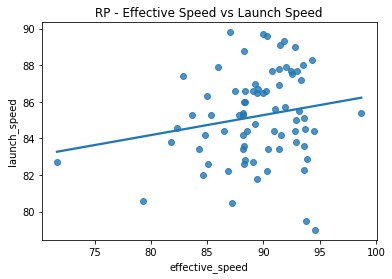

In [39]:
#Plot effective speed on x axis and launch speed on y axis and plug in dataframe
sns.regplot(x="effective_speed", y="launch_speed", ci=None, data = cleanRP_df).set(title = 'RP - Effective Speed vs Launch Speed')

### ANSWER: 

There is a positive relationship between effective speed and launch speed, in which the faster the effective speed, or ability to force the hitter to move the bat a greater distance in less time, the slower the batter's launch speed, which is a batter's exit velocity. 

### INTERPRETATION/OBSERVATION:


The faster the effective speed, (and the slower the batter's launch speed), the better the pitcher. This will help in later parts of the project analyze the different factors that make the best pitchers.